In [1]:
%pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
import scrap_data
data_saham = scrap_data.ambil_data("bbri")

data_saham

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-05-29,3250.0,3250.0,3250.0,3250.0,2693.580322,0,BBRI.JK
2018-05-30,3250.0,3280.0,3140.0,3140.0,2602.412842,306227900,BBRI.JK
2018-05-31,3170.0,3190.0,3070.0,3080.0,2552.685303,312316900,BBRI.JK
2018-06-01,3080.0,3080.0,3080.0,3080.0,2552.685303,0,BBRI.JK
2018-06-04,3150.0,3170.0,3100.0,3130.0,2594.125000,211936400,BBRI.JK
...,...,...,...,...,...,...,...
2023-05-23,5475.0,5600.0,5475.0,5500.0,5500.000000,255251600,BBRI.JK
2023-05-24,5525.0,5600.0,5450.0,5600.0,5600.000000,187436100,BBRI.JK
2023-05-25,5500.0,5575.0,5450.0,5475.0,5475.000000,224391900,BBRI.JK


In [5]:
df = data_saham

In [16]:
index_labels = df.index.values
index_labels

array(['2018-05-29T00:00:00.000000000', '2018-05-30T00:00:00.000000000',
       '2018-05-31T00:00:00.000000000', ...,
       '2023-05-25T00:00:00.000000000', '2023-05-26T00:00:00.000000000',
       '2023-05-29T00:00:00.000000000'], dtype='datetime64[ns]')

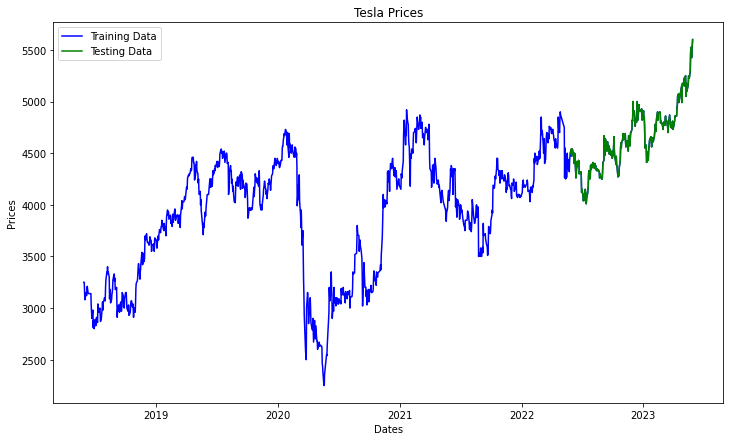

In [17]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [8]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [27]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
from statsmodels.tsa.arima.model import ARIMA

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(len(history))
# print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test_ar, predictions)
# print('Testing Mean Squared Error: %.3f' % error)
# error2 = smape_kun(test_ar, predictions)
# print('Symmetric mean absolute percentage error: %.3f' % error2)
print(len(history))


993
1242


In [25]:
history

[3250.0,
 3140.0,
 3080.0,
 3080.0,
 3130.0,
 3110.0,
 3150.0,
 3270.0,
 3140.0,
 3140.0,
 3140.0,
 3140.0,
 3140.0,
 3140.0,
 3140.0,
 3140.0,
 2960.0,
 2910.0,
 2980.0,
 2890.0,
 2820.0,
 2840.0,
 2750.0,
 2840.0,
 2850.0,
 2830.0,
 2930.0,
 2910.0,
 2840.0,
 3010.0,
 3050.0,
 2990.0,
 2970.0,
 2970.0,
 2970.0,
 2870.0,
 2850.0,
 2890.0,
 2980.0,
 3040.0,
 3010.0,
 2990.0,
 3040.0,
 3090.0,
 3080.0,
 3070.0,
 3190.0,
 3250.0,
 3330.0,
 3410.0,
 3350.0,
 3330.0,
 3330.0,
 3390.0,
 3140.0,
 3130.0,
 3210.0,
 3050.0,
 3050.0,
 3180.0,
 3150.0,
 3150.0,
 3270.0,
 3270.0,
 3380.0,
 3330.0,
 3290.0,
 3190.0,
 3180.0,
 3170.0,
 3110.0,
 2930.0,
 2960.0,
 3030.0,
 2970.0,
 2970.0,
 2910.0,
 3000.0,
 3070.0,
 2970.0,
 2940.0,
 3000.0,
 3090.0,
 3120.0,
 3010.0,
 3030.0,
 2990.0,
 3070.0,
 3150.0,
 3180.0,
 3110.0,
 3100.0,
 3000.0,
 2980.0,
 2970.0,
 3020.0,
 3010.0,
 2910.0,
 2950.0,
 3000.0,
 3000.0,
 3070.0,
 3090.0,
 3020.0,
 3050.0,
 3020.0,
 2950.0,
 3000.0,
 2990.0,
 2950.0,
 3030.0,
 

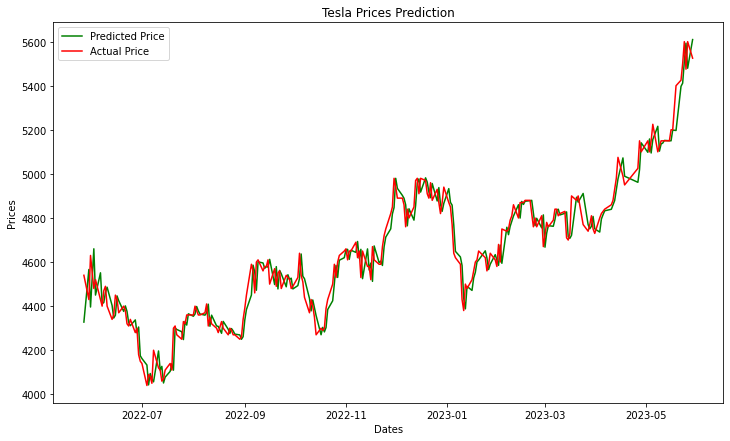

In [20]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [21]:
len(predictions)

249

In [23]:
output = model_fit.forecast(steps=7)
output

array([5609.29962786, 5593.64356097, 5604.33259261, 5602.52886608,
       5602.50771409, 5603.59274955, 5603.12338971])

In [4]:
stock_data = data_saham

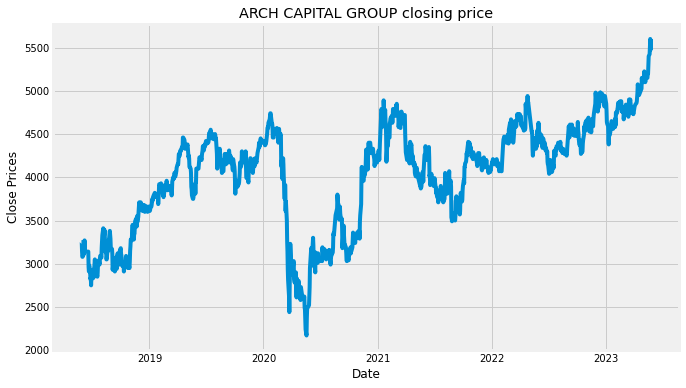

In [5]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

<Axes: ylabel='Density'>

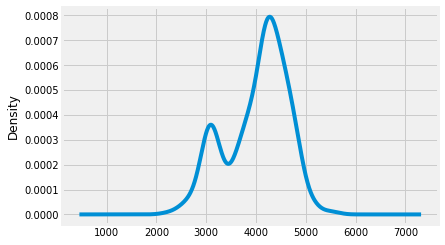

In [6]:
#Distribution of the dataset
df_close = stock_data['Close']

df_close.plot(kind='kde')

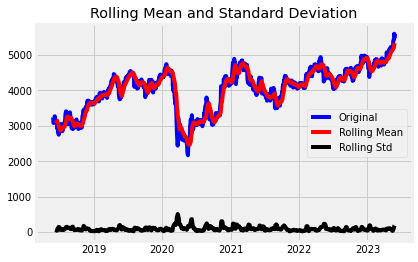

Results of dickey fuller test
Test Statistics                  -1.717779
p-value                           0.421976
No. of lags used                  3.000000
Number of observations used    1238.000000
critical value (1%)              -3.435643
critical value (5%)              -2.863877
critical value (10%)             -2.568014
dtype: float64


In [7]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


<Figure size 432x288 with 0 Axes>

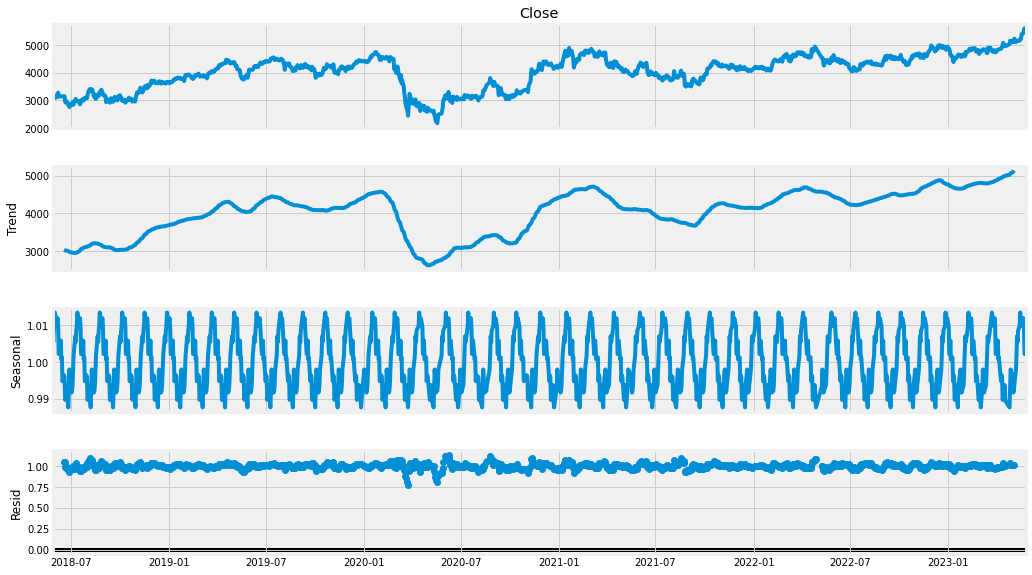

In [8]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


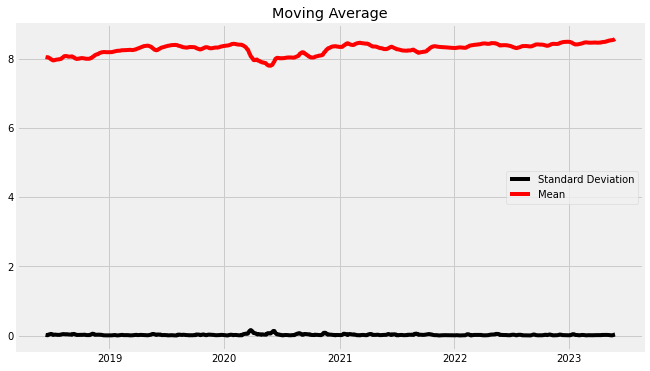

In [9]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

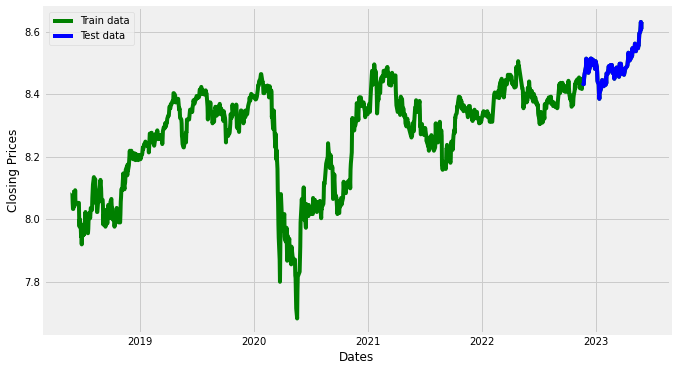

In [10]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5334.268, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5332.304, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5332.245, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5335.946, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5333.563, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.270 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1114
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2668.973
Date:                Sun, 28 May 2023   AIC                          -5335.946
Time:                        20:18:27   BIC                          -5330.931
Sample:                             0   HQIC                         -5334.050
                               - 1114                                  

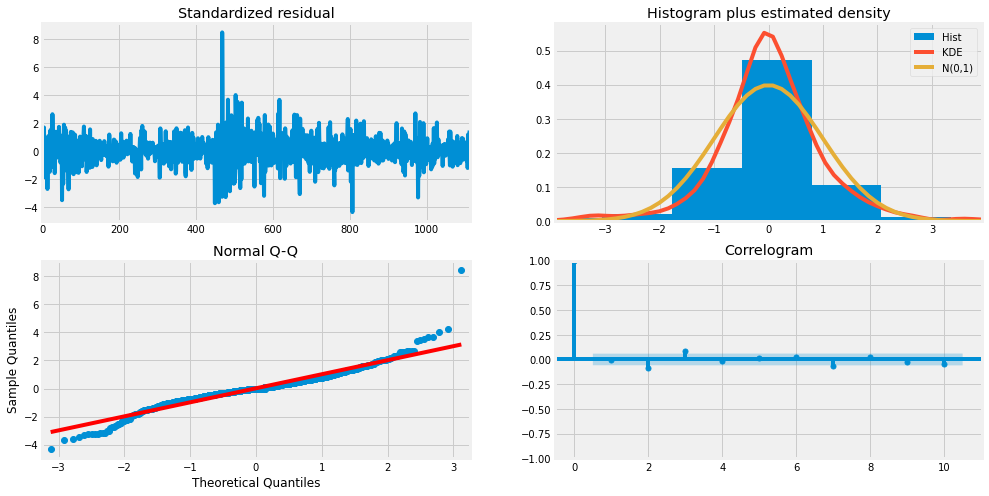

In [11]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [16]:
#Modeling
# Build Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

c:\Users\othma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\othma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\othma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1114
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2676.466
Date:                Sun, 28 May 2023   AIC                          -5344.933
Time:                        20:19:46   BIC                          -5324.874
Sample:                             0   HQIC                         -5337.349
                               - 1114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4269      0.163     -2.624      0.009      -0.746      -0.108
ma.L1          0.4335      0.161      2.699      0.007       0.119       0.748
ma.L2         -0.0980      0.020     -4.973      0.0

In [20]:
forecast = fitted.forecast(steps=361, alpha=0.05)


c:\Users\othma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [21]:
print(type(forecast))

<class 'pandas.core.series.Series'>


In [22]:
# Print the forecasted values
print("Forecasted Values:")
print(forecast)

Forecasted Values:
1114    8.451732
1115    8.447118
1116    8.449088
1117    8.448247
1118    8.448606
          ...   
1470    8.448498
1471    8.448498
1472    8.448498
1473    8.448498
1474    8.448498
Name: predicted_mean, Length: 361, dtype: float64


In [ ]:
# Make as pandas series
fc_series = pd.Series(forecast, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

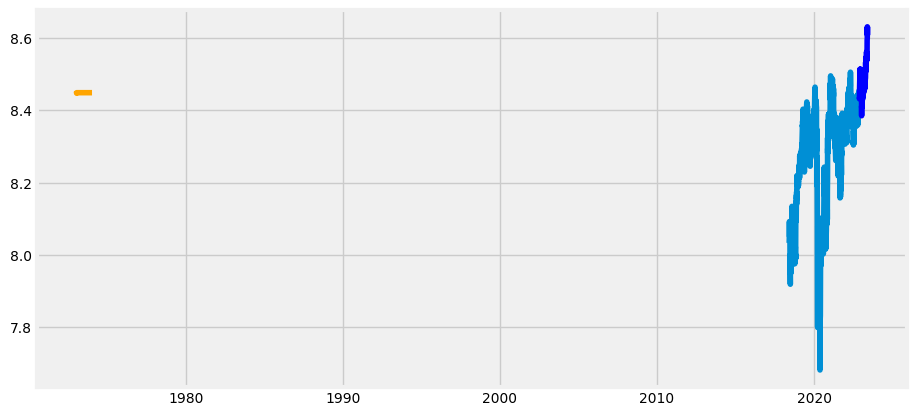

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(forecast, color = 'orange',label='Predicted Stock Price')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error




def prediksi_arima(df,lama_pred):
    train_data, test_data = df[0:int(len(df)*0.8)-1], df[int(len(df)*0.8)+1:]

    train_ar = train_data['Close'].values
    test_ar = test_data['Close'].values
    from statsmodels.tsa.arima.model import ARIMA

    # https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
    history = [x for x in train_ar]
    print(type(history))
    predictions = list()
    for t in range(len(test_ar)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test_ar[t]
        history.append(obs)
    predictions = np.array(predictions)
    harga_arima = model_fit.forecast(steps=lama_pred)
    harga_arima = harga_arima.tolist()

    predictions_arima = []

    for i in predictions:
        predictions_arima.append(i)


    return(harga_arima,predictions_arima)
